# 1. Non-stiff instance $\mu = 1$

## 1.1. Model description

In [3]:
using ReachabilityAnalysis
using BenchmarkTools, Plots

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1260


In [6]:
@taylorize function vdp!(dx, x, params, t)
    local μ = 1.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

## 1.2. Reachability settings

In [11]:
X0 = Hyperrectangle(low=[1.25, 2.35], high=[1.55, 2.45]) # initial condition
prob = @ivp(x' = vdp!(x), dim=2, x(0) ∈ X0) # initial-value problem
T = 7.0; # time horizon

## 1.3. Results

In [12]:
sol = solve(prob, T=T, alg=TMJets(abs_tol=1e-10, orderT=10, orderQ=2));

In [13]:
solz = overapproximate(sol, Zonotope);

In [16]:
@assert all([ρ([0.0, 1.0], X) < 2.75 for X in solz])

true

In [29]:
function run_and_check(prob, T)
    sol = solve(prob, T=T, alg=TMJets(abs_tol=1e-10, orderT=10, orderQ=2))
    solz = overapproximate(sol, Zonotope)
    all([ρ([0.0, 1.0], X) < 2.75 for X in solz]) 
end

@btime run_and_check($prob, $T)

  305.880 ms (4843241 allocations: 299.10 MiB)


true

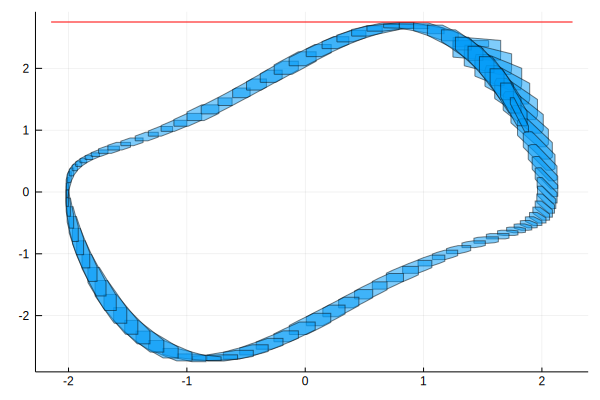

In [23]:
plot(solz, vars=(1, 2))
plot!(x -> 2.75, color=:red, lab="")

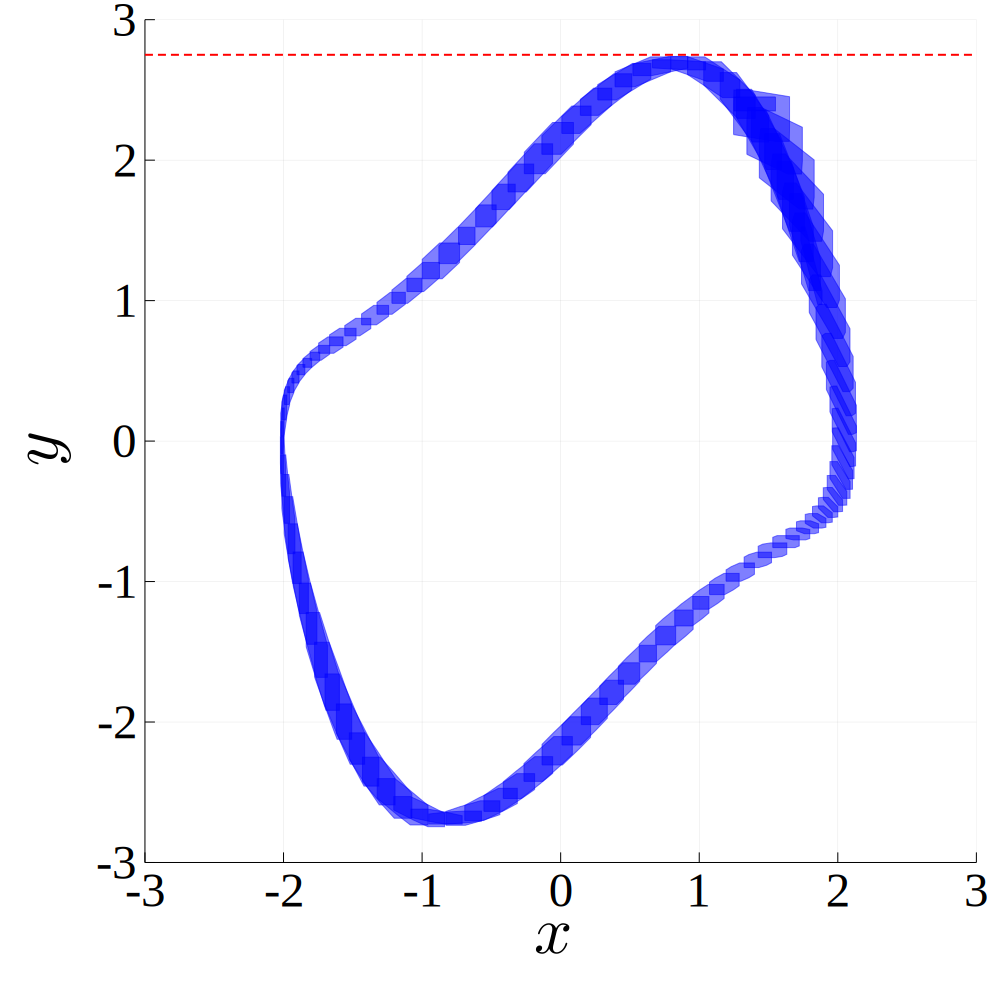

In [21]:
# publication-ready plot
using LaTeXStrings, Plots, Plots.PlotMeasures, LaTeXStrings

plot(solz, vars=(1, 2),
     tickfont=font(30, "Times"), guidefontsize=45,
     xlab=L"x\raisebox{-0.5mm}{\textcolor{white}{.}}",
     ylab=L"y\raisebox{2mm}{\textcolor{white}{.}}",
     xtick=[-3., -2., -1., 0., 1., 2., 3.], ytick=[-3., -2., -1., 0., 1., 2., 3.],
     xlims=(-3., 3.), ylims=(-3., 3.),
     bottom_margin=6mm, left_margin=2mm, right_margin=4mm, top_margin=3mm,
     size=(1000, 1000), linecolor="blue", color="blue")

plot!(x->x, x->2.75, -3., 3., line=2, color="red", linestyle=:dash, legend=nothing)

# 2. Stiff instance ($\mu = 2$)

## 2.1. Model description

In [30]:
@taylorize function vdp_stiff!(dx, x, params, t)
    local μ = 2.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

## 2.2. Reachability settings

In [74]:
X0 = Hyperrectangle(low=[1.55, 2.35], high=[1.85, 2.45]) # initial condition
prob = @ivp(x' = vdp_stiff!(x), dim=2, x(0) ∈ X0) # initial-value problem
T = 8.0; # time horizon

## 2.3. Model description

In [75]:
sol = solve(prob, T=T, alg=TMJets(abs_tol=1e-10, orderT=8, orderQ=2));

In [76]:
solz = overapproximate(sol, Zonotope);

In [77]:
maximum([ρ([0.0, 1.0], X) for X in solz])

5.6658769048235875

In [44]:
@assert all([ρ([0.0, 1.0], X) < 4.0 for X in solz])

AssertionError: AssertionError: all([ρ([0.0, 1.0], X) < 4.0 for X = solz])